<a href="https://colab.research.google.com/github/PedroTricossi/Analise-de-dados/blob/master/Classifica%C3%A7%C3%A3o_MNISTfashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de classificação do dataset MNIST feshion utilizando redes neurais convolutivas(CNN)**

### Importação das bibliotecas

In [0]:
import math
import logging
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Importação do dataset a ser utilizado

In [0]:
#O próprio tf tem o dataset MNIST fashion, portanto impotamos dele para poupar esforço.
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

### Visualização do dataset

In [0]:
#Para facilitar a leitura dos não falantes de inglês, coloquei as classes em português
class_names = ['Camisera/top', 'Calça', 'Pullover', 'Vestido', 'Blusa',
               'Sandalia',      'Camisa',   'Tênis',  'Bolsa',   'Bota alta']

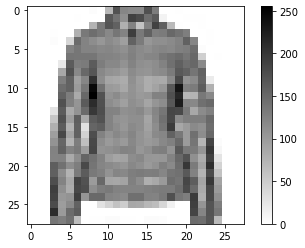

In [5]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

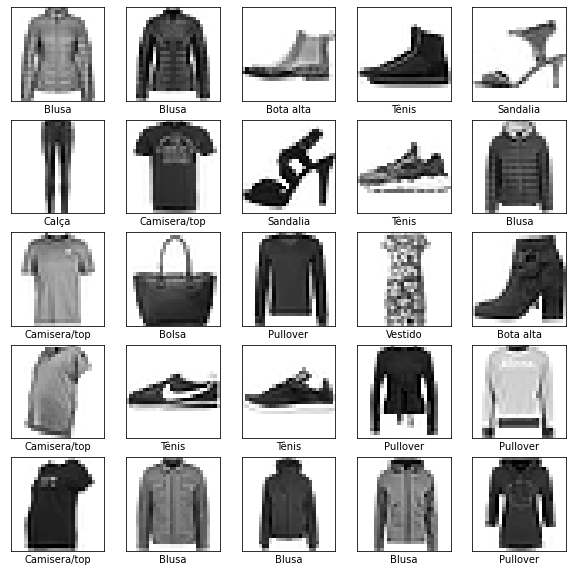

In [6]:
#Ao invés de imprimir uma imagem por vez, podemos imprimir varias ao mesmo tempo, facilitando a visualização
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

### Limpeza de dados

In [7]:
#Separação do dataset em dois, uma parte maior para ser usada como treino e uma parte menor para ser usada como teste e avaliação do modelo.
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Numero de imagens utilizadas para treino: {}".format(num_train_examples))
print("Numero de imagens utilizadas para teste:  {}".format(num_test_examples))

Numero de imagens utilizadas para treino: 60000
Numero de imagens utilizadas para teste:  10000


In [0]:
# A normalização das imagens consiste em pegar um pixel com valores que variam [0, 255] e transformar para um valor [0, 1]
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#Para salvar os datasets na memôria
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

### Criação do modelo

In [0]:
#Criação da rede neural, a primera parte(até o Flatten), é a parte da rede de convolução e maxpooling, que 'facilita' a vizualização das imagens
#A segunda parte é a rede neural normal, essa contendo uma camada de 256 neurônios.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [0]:
#Definição do optimizados e de como será feita a medição de erro da rede.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
#Definição de quantas imagens serão treinadas por vez, para aumentar a velocidade de treino
#42 pois é a resposta para tudo no universo, não é mesmo?
BATCH_SIZE = 42
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

### Treinamento do modelo

In [12]:
#Treinamento da rede em si
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.3872 - accuracy: 0.8614
Epoch 2/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.2529 - accuracy: 0.9080
Epoch 3/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.2043 - accuracy: 0.9254
Epoch 4/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.1708 - accuracy: 0.9376
Epoch 5/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.1447 - accuracy: 0.9463
Epoch 6/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.1213 - accuracy: 0.9550
Epoch 7/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.0972 - accuracy: 0.9634
Epoch 8/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.0793 - accuracy: 0.9703
Epoch 9/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.0640 - accuracy: 0.9766
Epoch 10/10
1429/1429 [==============================] - 4s 3ms/step - loss: 0.054

### Avaliação da precisão do modelo

In [13]:
#Avaliação com imagens nunca antes vistas pela rede.
est_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/42))
print('Accuracy on test dataset:', test_accuracy)

239/239 [==============================] - 2s 9ms/step - loss: 0.3129 - accuracy: 0.9243
Accuracy on test dataset: 0.9243000149726868
